In [1]:
# Project PyAutomata Performance Testing
"""
This notebook exists as a means to evaluate Rust v. Python logic computation.
"""
# Third-Party Modules
import matplotlib.pyplot as plt

# Local Modules
from pyautomata.render import prepare_plot
from pyautomata.handlers import RUST_AVAILABLE
from pyautomata.handlers.benchmark import get_comparison_benchmarks

In [2]:
# Generation Calculation
"""
Rust is near instant on modern computers for values less than 10000.
Python is significantly slower and 10000 will start to become several minutes,
  with higher values quickly taking hours.

A print statement will track the progress as it works through the dataset.

`end` is inclusive and will be included in the test results, unlike Python's 
  range function. The pattern is the standard center start pattern.

These default values will take about 30 minutes to compute for consumer hardware.
Ending at 5000 will be around 10 minutes.
"""
# 
start = 1000
end = 10000
step = 1000

rust_benchmarks, python_benchmarks = get_comparison_benchmarks(start, end, step)

Completed generation benchmarks for both Rust and Python.


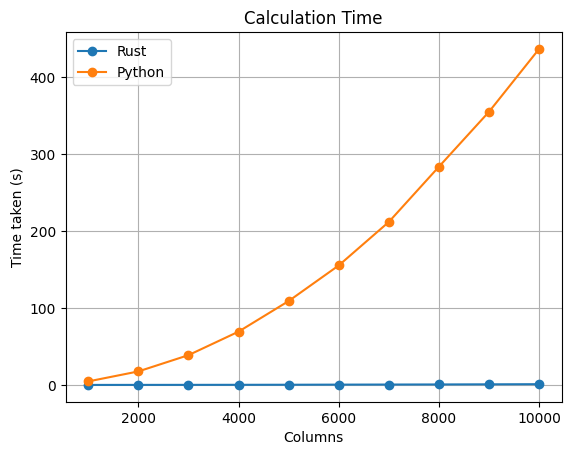

In [6]:
# Graph the time taken to calculate

for i in [rust_benchmarks, python_benchmarks]:
    plt.plot(i.data.keys(), i.data.values(), marker='o', linestyle='-', label=i.engine.value)

prepare_plot('Columns', 'Time taken (s)', 'Calculation Time', legend=True)

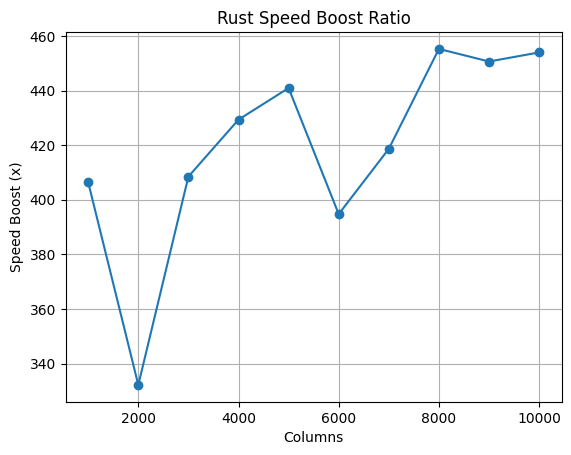

In [7]:
# Rust Speed Ratio

rust_boost = {}

if not RUST_AVAILABLE:
    raise ValueError('Rust must be available for this test')

for columns in rust_benchmarks.data:
    rust_boost[columns] = python_benchmarks.data[columns] / rust_benchmarks.data[columns]

plt.plot(rust_boost.keys(), rust_boost.values(), marker='o', linestyle='-')
prepare_plot('Columns', 'Speed Boost (x)', 'Rust Speed Boost Ratio')

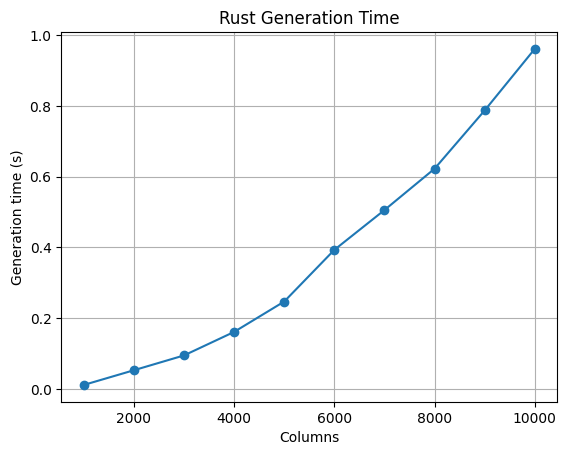

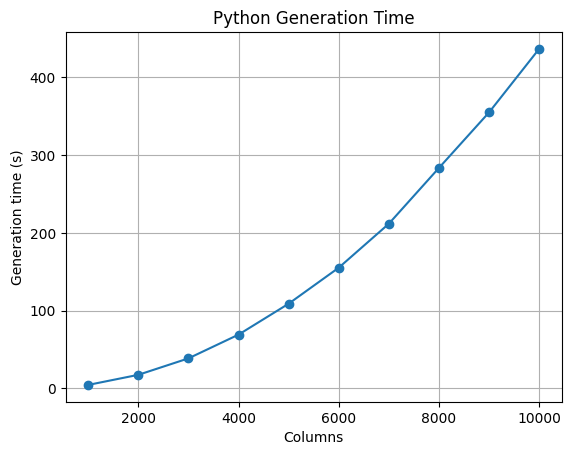

In [5]:
# Plot Individual Times
"""
This cell shows each generation time individually which better shows Rust's
  since it appears to be near instant on the same chart as Python.
"""

for i in [rust_benchmarks, python_benchmarks]:
    plt.plot(i.data.keys(), i.data.values(), marker='o', linestyle='-', label=i.engine.value)
    prepare_plot('Columns', 'Generation time (s)', f'{i.engine.value} Generation Time')